In [122]:
import nltk
import os
import chardet
import re

In [12]:
# nltk.download('gutenberg')

In [13]:
# alice=nltk.corpus.gutenberg.raw('carroll-alice.txt')
# ttt = nltk.tokenize.TextTilingTokenizer(stopwords='<EOS>')
# tiles = ttt.tokenize(alice[140309 : ])

Movie DIC
https://github.com/julianser/hed-dlg-truncated/issues/5

---

[The NPS Chat Corpus](http://faculty.nps.edu/cmartell/NPSChat.htm)
10,567 posts 

In [37]:
from nltk.corpus import nps_chat


In [42]:
for p in nps_chat.xml_posts()[3:5]:
    print(p.get("class"), p.get("user"))
    print(p.text)
    tagged_words = list((t.get("word"), t.get("pos")) for t in p[0]) # <-- here it is
    print(tagged_words)
    print()

Greet 10-19-20sUser59
hey everyone  
[('hey', 'UH'), ('everyone', 'NN')]

Statement 10-19-20sUser115
ah well
[('ah', 'UH'), ('well', 'UH')]



In [44]:
posts = nltk.corpus.nps_chat.xml_posts()
Labeled_names=[(post.text,post.get('class')) for post in posts]

In [46]:
Labeled_names[:30]

[('now im left with this gay name', 'Statement'),
 (':P', 'Emotion'),
 ('PART', 'System'),
 ('hey everyone  ', 'Greet'),
 ('ah well', 'Statement'),
 ('NICK :10-19-20sUser7', 'System'),
 ('10-19-20sUser7 is a gay name.', 'Accept'),
 ('.ACTION gives 10-19-20sUser121 a golf clap.', 'System'),
 (':)', 'Emotion'),
 ('JOIN', 'System'),
 ('hi 10-19-20sUser59', 'Greet'),
 ('26/ m/ ky women that are nice please pm me', 'Statement'),
 ('JOIN', 'System'),
 ('PART', 'System'),
 ('there ya go 10-19-20sUser7', 'Statement'),
 ("don't golf clap me.", 'Reject'),
 ('fuck you 10-19-20sUser121:@', 'Reject'),
 ('whats everyone up to?', 'whQuestion'),
 ('PART', 'System'),
 ('PART', 'System'),
 ("i'll thunder clap your ass.", 'Statement'),
 ('PART', 'System'),
 ('and i dont even know what that means.', 'Continuer'),
 ('that sounds painful', 'Statement'),
 ('any ladis wanna chat? 29 m', 'ynQuestion'),
 ('26/m', 'Statement'),
 ('JOIN', 'System'),
 ('my cousin drew a messed up pic on my cast', 'Statement'),
 ('

---
TextTiling

Similarity determination:


* Vocabulary Introduction: Similarity is measured as the negative of the number of new terms introduced on either side of the gap

* Block Comparison: compute correlation coefficients between left and right blocks based on within-block term frequency (without inverse document frequency) (We will use this method) Normalized inner product of two word vectors

In [121]:
def multiple_replace(dict_, text):
    # Create a regular expression  from the dictionary keys
    regex = re.compile("(%s)" % "|".join(map(re.escape, dict_.keys())))
    # For each match, look-up corresponding value in dictionary
    return regex.sub(lambda mo: dict_[mo.string[mo.start():mo.end()]], text) 

dict_sub = {'\"':'\'','´':'\'',
            '\'s':' \'s','\'m':' \'m','\'ve':' \'ve','\'re':' \'re','\'ll':' \'ll','\'d':' \'d'}

In [2]:
from smart_open import smart_open
class MyCorpus(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            if not fname.endswith('.txt'):
                continue
            f = open(os.path.join(self.dirname, fname), 'rb')
            line = f.read()
            f.close()

#             for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
            encode_type = chardet.detect(line)  
            line = line.decode(encode_type['encoding']) #进行相应解码，赋给原标识符（变量）
            line = line.replace('<EOS>\n','\n')
            line = line.replace('<EOS>','\n')
            line = line.replace('\n','\n\n')
            yield line

In [3]:
corpus = MyCorpus('./data/')

In [4]:
sentences_list = []
for s in corpus:
    sentences_list.append(s)
#sentences = ' '.join(sentences)

In [31]:
# sentences = ' '.join(sentences_list)
sentences = sentences_list[1]
ttt = nltk.tokenize.TextTilingTokenizer(w=5)
tiles = ttt.tokenize(sentences)

In [32]:
f = open('./TextSegment/TextTiling.txt','a')
for item in tiles:
    f.write(item)
    f.write('\n\n================END OF THIS SEGMENT================\n\n')

In [34]:
sentences.count('\n\n')

1289

In [35]:
len(tiles)

225

In [36]:
sentences.count('\n\n')/len(tiles)

5.728888888888889

---
Word Embedding + TextTiling like + virtual sentence

In [63]:
from gensim import corpora,models
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [204]:
from smart_open import smart_open
class MyCorpus2(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            if not fname.endswith('.txt'):
                continue
            for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
#             for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
                encode_type = chardet.detect(line) 
                line = line.decode(encode_type['encoding']) #进行相应解码，赋给原标识符（变量）
                line = line.lower()
                line = multiple_replace(dict_sub, line)
                
                line = re.sub(',|\.|\?|\!|\.\.\.|-', '', line)
                line = line.replace('<eos>\n','')
                line = line.replace('<eos>','')
                yield line

In [205]:
sentences = MyCorpus2('./data/')
sentences = [x.split() for x in sentences]

In [206]:
model = models.Word2Vec(sentences, min_count=1,size=256)

In [207]:
sentences[0]

['a',
 'big',
 'typhoon',
 'is',
 'brewing',
 'south',
 'of',
 'the',
 'ryukyu',
 'islands',
 'heading',
 'northeast',
 'at',
 '<num>',
 'mile',
 'per',
 'hour']

In [208]:
print(model)

Word2Vec(vocab=3212, size=256, alpha=0.025)


In [210]:
heuristic_max(sentences[1],sentences[10],model)

0.9999287009239197

In [199]:
similarity = []
for i in range(len(sentences)-1):
    similarity.append(heuristic_max(sentences[i],sentences[i+1]))

In [181]:
len(similarity)

1036

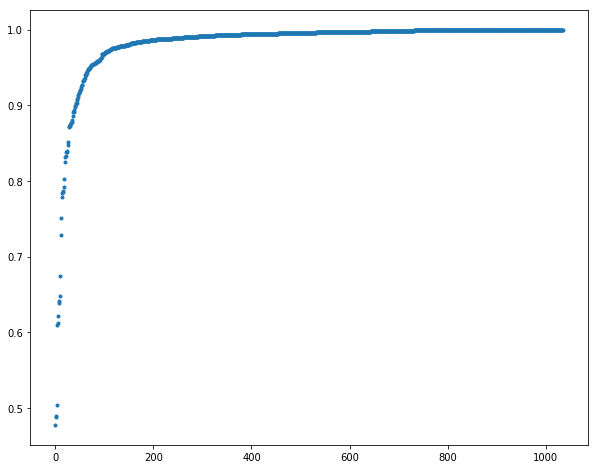

In [200]:
plt.figure(figsize=(10,8))
plt.plot(np.sort(similarity),'.')


In [201]:
np.quantile(similarity,0.05)

0.9214488979625074

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import gensim

# Load Google's pre-trained Word2Vec model.
# model1 = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model4 = gensim.models.Word2Vec.load('./word2vec/model_inter_virtual')

In [3]:
from smart_open import smart_open
import os
import chardet
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn import metrics
import nltk

stop = set(stopwords.words('english'))

def read_lines(dirname):
    line_dict = {}
    with open(dirname, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
        tokenizer = RegexpTokenizer(r'\w+')
        for line in f:
            line = line.replace('[','').replace(']','')
            tmp = line.split('\n')[0].split(" +++$+++ ")
            line_ = nltk.word_tokenize(tmp[-1])
#             line_ = tokenizer.tokenize(tmp[-1].lower())
#             line_ = [x for x in line_ if x not in stop]
            line_dict[tmp[0]] = {'ID1':tmp[1],'MovieID':tmp[2],'Name':tmp[3],'Line':line_}
        return line_dict
    
def read_conversations(dirname):
    conva_dict = {}
    with open(dirname, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
        for line in f:
            line = line.replace('[','').replace(']','').replace('\'','')
            tmp = line.split('\n')[0].split(" +++$+++ ")
            yield tmp

In [4]:
def heuristic_max(s1_ID,s2_ID,line_dict, model=model4.wv):
#     s1 = list(set(s1))
#     s2 = list(set(s2))
    s1 = movie_lines[s1_ID]['Line']
    s2 = movie_lines[s2_ID]['Line']
    if len(s1)*len(s2) == 0:
        return np.nan
    matrix = np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        s1_vec = model[s1[i]] if s1[i] in model.vocab.keys() else np.random.normal(scale = 0.1,size = 300)
        for j in range(len(s2)):            
            s2_vec = model[s2[j]] if s2[j] in model.vocab.keys() else np.random.normal(scale = 0.1, size = 300)
            matrix[i][j] = cosine_similarity(s1_vec.reshape(1,-1),s2_vec.reshape(1,-1))
    return np.sum(np.max(matrix,1))/len(s1)
    #return matrix

In [5]:
# copy from https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise(ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise(ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y[window_len//2:-window_len//2+1]

In [6]:
movie_lines = read_lines('../datasets/cornell-corpus/movie_lines.txt')

In [7]:
conversations = read_conversations('../datasets/cornell-corpus/movie_conversations.txt')
conversations = [x for x in conversations]

In [8]:
conversations = pd.DataFrame(conversations)
conversations.columns = ['ID1','ID2','MovieID','LineIDs']
conversations.head(5)

,ID1,ID2,MovieID,LineIDs
0,u0,u2,m0,"L194, L195, L196, L197"
1,u0,u2,m0,"L198, L199"
2,u0,u2,m0,"L200, L201, L202, L203"
3,u0,u2,m0,"L204, L205, L206"
4,u0,u2,m0,"L207, L208"


In [16]:
for ids in conversations.LineIDs[0].split(', '):
    print(ids,movie_lines[ids]['Line'])

L194 ['Can', 'we', 'make', 'this', 'quick', '?', 'Roxanne', 'Korrine', 'and', 'Andrew', 'Barrett', 'are', 'having', 'an', 'incredibly', 'horrendous', 'public', 'break-', 'up', 'on', 'the', 'quad', '.', 'Again', '.']
L195 ['Well', ',', 'I', 'thought', 'we', "'d", 'start', 'with', 'pronunciation', ',', 'if', 'that', "'s", 'okay', 'with', 'you', '.']
L196 ['Not', 'the', 'hacking', 'and', 'gagging', 'and', 'spitting', 'part', '.', 'Please', '.']
L197 ['Okay', '...', 'then', 'how', "'bout", 'we', 'try', 'out', 'some', 'French', 'cuisine', '.', 'Saturday', '?', 'Night', '?']


In [18]:
def split_func(string):
    return int(string.split(', ')[0][1:]) 

conversations['startID'] = conversations.LineIDs.apply(split_func)
conversations = conversations.sort_values(by='startID').reset_index(drop=True)
conversations.head(5)

,ID1,ID2,MovieID,LineIDs,startID
0,u0,u3,m0,"L49, L50, L51",49
1,u8,u9,m0,"L59, L60, L61, L62",59
2,u2,u7,m0,"L63, L64, L65",63
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66
4,u2,u7,m0,"L77, L78",77


In [19]:
test = (conversations[['ID1','ID2']] == conversations[['ID1','ID2']].shift())
conversations['label'] = 1-(test['ID1'] & test['ID2'])*1
conversations.head(5)

,ID1,ID2,MovieID,LineIDs,startID,label
0,u0,u3,m0,"L49, L50, L51",49,1
1,u8,u9,m0,"L59, L60, L61, L62",59,1
2,u2,u7,m0,"L63, L64, L65",63,1
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66,0
4,u2,u7,m0,"L77, L78",77,0


In [20]:
len_ = np.where(conversations.label==1)[0][1:] - np.where(conversations.label==1)[0][:-1]
len_ = np.append(len_,conversations.label.tail(1))

In [21]:
s_cnt = [[x]*y for x,y in zip(np.arange(sum(conversations.label)),len_)]
s_cnt = [item for sublist in s_cnt for item in sublist]

In [22]:
conversations['s_cnt'] = s_cnt

In [23]:
foo = lambda a: ', '.join(a) 

In [24]:
conv_new = conversations.groupby(['ID1','ID2','s_cnt']).agg({'LineIDs':foo}).reset_index()
conv_new = conv_new.sort_values(by='s_cnt').reset_index(drop=True)

In [25]:
conv_new['Turn'] = conv_new.LineIDs.str.split(',').apply(len)

In [26]:
conv_new.head(10)

,ID1,ID2,s_cnt,LineIDs,Turn
0,u0,u3,0,"L49, L50, L51",3
1,u8,u9,1,"L59, L60, L61, L62",4
2,u2,u7,2,"L63, L64, L65, L66, L67, L68, L69, L70, L71, L...",20
3,u5,u8,3,"L103, L104, L105, L106, L107, L108, L109",7
4,u5,u6,4,"L123, L124, L125, L126, L127, L128, L129, L130...",12
5,u2,u7,5,"L139, L140, L141, L142, L143, L144, L145, L146...",9
6,u4,u5,6,"L148, L149, L150",3
7,u5,u6,7,"L151, L152",2
8,u2,u7,8,"L157, L158, L159",3
9,u10,u11,9,"L161, L162",2


In [28]:
conv_filter = conv_new.loc[(conv_new.Turn>=4) & (conv_new.Turn<=10)].copy()

In [29]:
new_df = pd.DataFrame(conv_filter.LineIDs.str.split(', ').tolist(),index=conv_filter.s_cnt).stack()
new_df = new_df.reset_index()
new_df.columns = ['MovieID','label','LineIDs']
new_df.label = 1 - new_df.label.clip(upper=1)
new_df.head(10)

,MovieID,label,LineIDs
0,1,1,L59
1,1,0,L60
2,1,0,L61
3,1,0,L62
4,3,1,L103
5,3,0,L104
6,3,0,L105
7,3,0,L106
8,3,0,L107
9,3,0,L108


In [31]:
sim = [heuristic_max(new_df.LineIDs[i],new_df.LineIDs[i+1],line_dict = movie_lines) for i in range(len(new_df)-1)]

In [32]:
len(model4.wv.vocab)

28808

In [33]:
sim_ = sim + [np.nan]

In [34]:
new_df['similarity'] = sim_

In [35]:
new_df.head()

,MovieID,label,LineIDs,similarity
0,1,1,L59,0.733542
1,1,0,L60,0.466659
2,1,0,L61,0.257521
3,1,0,L62,0.339333
4,3,1,L103,0.465234


In [36]:
new_df.describe()

,MovieID,label,similarity
count,95046.000000,95046.000000,94908.000000
mean,21460.702828,0.162100,0.462639
std,12451.119892,0.368545,0.141319
min,1.000000,0.000000,-0.069136
25%,10661.000000,0.000000,0.363042
50%,21450.000000,0.000000,0.448935
75%,32050.000000,0.000000,0.548716
max,43046.000000,1.000000,1.000000


In [37]:
new_df.loc[new_df.label==1].describe()

,MovieID,label,similarity
count,15407.000000,15407.0,15390.000000
mean,21465.194911,1.0,0.455749
std,12439.838487,0.0,0.144662
min,1.000000,1.0,-0.020791
25%,10691.500000,1.0,0.354748
50%,21496.000000,1.0,0.439610
75%,32062.000000,1.0,0.539630
max,43046.000000,1.0,1.000000


In [38]:
new_df.loc[new_df.label==0].describe()

,MovieID,label,similarity
count,79639.000000,79639.0,79518.000000
mean,21459.833787,0.0,0.463973
std,12453.379076,0.0,0.140624
min,1.000000,0.0,-0.069136
25%,10655.000000,0.0,0.364593
50%,21438.000000,0.0,0.450636
75%,32049.000000,0.0,0.550440
max,43046.000000,0.0,1.000000


In [39]:
new_df.to_csv('TextSimilarity.csv',index=False)

In [40]:
1-new_df.label.sum()/len(new_df)

0.8378995433789954

In [41]:
scores = new_df.loc[~new_df.similarity.isnull()].similarity.get_values()
labels = new_df.loc[~new_df.similarity.isnull()].label.get_values()
smooth_score = smooth(scores)

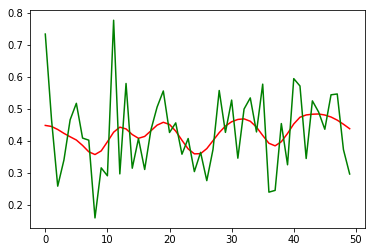

In [42]:
plt.plot(smooth(scores)[:50],c='r')
plt.plot(scores[:50],c='g')

In [48]:
block_size = 5
depth_scores = []
for i in range(block_size,len(smooth_score)-block_size):
    lpeak = max(scores[i-block_size:i])
    rpeak = max(scores[i+1:i+block_size+1])
    depth_scores.append(lpeak+rpeak-2*scores[i])
depth_scores = np.array(depth_scores)

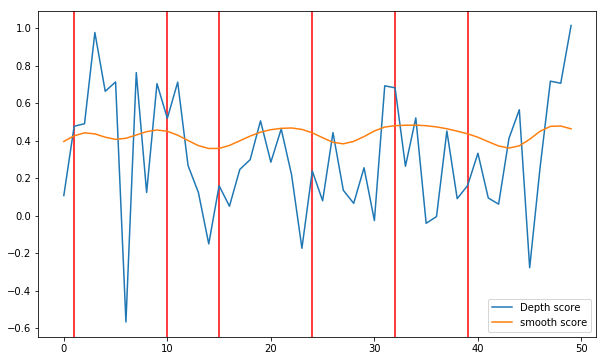

In [49]:
plt.figure(figsize=(10,6))
for i in np.where(labels[10:50])[0]:
    plt.axvline(i,c='r')
plt.plot(depth_scores[:50],label='Depth score')
plt.plot(smooth_score[10:60],label='smooth score')
plt.legend()

In [50]:
# miu = new_df.similarity.mean()
# std = new_df.similarity.std()
mean_ = np.mean(depth_scores)
std_ = np.std(depth_scores)
print(mean_,std_)

0.3401610764795546 0.3245246884296022


In [51]:
idx = np.where(labels[block_size:-block_size]==1)[0]
print(np.mean(depth_scores[idx]),np.std(depth_scores[idx]))

0.3507979999178254 0.32860664858809624


In [52]:
idx = np.where(labels[block_size:-block_size]==0)[0]
print(np.mean(depth_scores[idx]),np.std(depth_scores[idx]))

0.338102614871165 0.3236884369468224


In [53]:
alphas = np.arange(-1,1,0.05)
for alpha in alphas:
    th = mean_ + alpha*std_
    pred = (depth_scores<th).astype(int)
    idx = np.where(labels[block_size:-block_size]==1)[0]
    acc = sum(pred==labels[block_size:-block_size])/len(pred)
    p = sum(pred[idx])/sum(pred)
    r = sum(pred[idx])/sum(labels[block_size:-block_size])
    print('alpha:{:.3f},threshold:{:.3f},accuracy:{:.3f},precision:{:.3f},recall:{:.3f}'.format(alpha,th,acc,p,r))

alpha:-1.000,threshold:0.016,accuracy:0.732,precision:0.156,recall:0.148
alpha:-0.950,threshold:0.032,accuracy:0.723,precision:0.154,recall:0.158
alpha:-0.900,threshold:0.048,accuracy:0.715,precision:0.154,recall:0.169
alpha:-0.850,threshold:0.064,accuracy:0.707,precision:0.154,recall:0.180
alpha:-0.800,threshold:0.081,accuracy:0.698,precision:0.155,recall:0.194
alpha:-0.750,threshold:0.097,accuracy:0.688,precision:0.154,recall:0.206
alpha:-0.700,threshold:0.113,accuracy:0.678,precision:0.154,recall:0.218
alpha:-0.650,threshold:0.129,accuracy:0.668,precision:0.152,recall:0.230
alpha:-0.600,threshold:0.145,accuracy:0.657,precision:0.153,recall:0.246
alpha:-0.550,threshold:0.162,accuracy:0.646,precision:0.153,recall:0.262
alpha:-0.500,threshold:0.178,accuracy:0.635,precision:0.153,recall:0.278
alpha:-0.450,threshold:0.194,accuracy:0.624,precision:0.154,recall:0.294
alpha:-0.400,threshold:0.210,accuracy:0.611,precision:0.154,recall:0.312
alpha:-0.350,threshold:0.227,accuracy:0.598,precisi

In [234]:
conversations.head()

,ID1,ID2,MovieID,LineIDs,Turn,startID,label,s_cnt
0,u0,u3,m0,"L49, L50, L51",3,49,1,0
1,u8,u9,m0,"L59, L60, L61, L62",4,59,1,1
2,u2,u7,m0,"L63, L64, L65",3,63,1,2
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",9,66,0,2
4,u2,u7,m0,"L77, L78",2,77,0,2


In [238]:
# save cornell corpus line by line in .txt
# for movie in conversations.MovieID.unique():
#     tmp_df = conversations.loc[conversations.MovieID==movie].copy()
#     tmp_df = pd.DataFrame(tmp_df.LineIDs.str.split(', ').tolist(),index=tmp_df.MovieID).stack()
#     tmp_df = tmp_df.reset_index()
#     tmp_df.columns = ['MovieID','label','LineIDs']
#     for i in range(len(tmp_df)):
#         s = movie_lines[tmp_df.LineIDs.loc[i]]['Line']
#         with open('./data/cornell/%s.txt'%movie, 'a') as f:
#             f.write(' '.join(s)+'\n')

---
improve our own model using google-news

https://stackoverflow.com/questions/35117491/is-it-possible-to-re-train-a-word2vec-model-e-g-googlenews-vectors-negative300

In [239]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                yield tmp+line.split()
                tmp = line.split()
                
sentences = MySentences('./data/cornell/') # a memory-friendly iterator

In [417]:
model2 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model2.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

In [418]:
model2.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

In [421]:
model2.train(sentences,total_examples=model2.corpus_count,epochs=model2.epochs)

(2350571, 3411727)

In [440]:
model2.save('./word2vec/model_inter')
# model2 = gensim.models.Word2Vec.load('./word2vec/model_inter')

In [429]:
model3 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model3.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator
model3.train(sentences,total_examples=model2.corpus_count,epochs=model2.epochs)

(2350577, 3411727)

In [243]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model4 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model4.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model4.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model4.train(sentences,total_examples=model4.corpus_count,epochs=model4.epochs)

(5555054, 8351942)

In [244]:
model4.corpus_count

304713

In [264]:
# model4.save('./word2vec/model_inter_virtual')

In [422]:
model2.wv.similarity('is','are')

0.4866452813088104

In [426]:
model2.wv.similarity('cat','dog')

0.7651290159166821

In [435]:
model2.wv.similar_by_word('cat')

[('cats', 0.7892244458198547),
 ('dog', 0.7651289701461792),
 ('kitten', 0.756538987159729),
 ('puppy', 0.7189644575119019),
 ('pup', 0.701250433921814),
 ('pet', 0.7005758285522461),
 ('rabbit', 0.6838946342468262),
 ('pooch', 0.6688399314880371),
 ('dogs', 0.6632210612297058),
 ('poodle', 0.6489315629005432)]

In [430]:
model3.wv.similarity('cat','dog')

0.9353906436740264

In [431]:
model3.wv.similarity('is','are')

0.5648897102859702

In [434]:
model3.wv.similar_by_word('cat')

[('letter', 0.9836823344230652),
 ('pilot', 0.9833642840385437),
 ('machine', 0.9797714948654175),
 ('card', 0.9794377088546753),
 ('hair', 0.976094126701355),
 ('camera', 0.9758375287055969),
 ('wedding', 0.9751882553100586),
 ('ring', 0.9746631383895874),
 ('divorce', 0.9745532274246216),
 ('prom', 0.9743425250053406)]

In [15]:
model4.wv.similar_by_word('cat')

[('kitten', 0.7502208948135376),
 ('dog', 0.7263214588165283),
 ('cats', 0.7166353464126587),
 ('feline', 0.6899605989456177),
 ('puppy', 0.6886088252067566),
 ('pup', 0.6836971640586853),
 ('pet', 0.6617459058761597),
 ('pooch', 0.648727297782898),
 ('poodle', 0.6431140303611755),
 ('rabbit', 0.6428321003913879)]

In [259]:
word_pair = ['.','you']

In [475]:
# original google news
model1.similarity(word_pair[0],word_pair[1])

0.12504148369861123

In [476]:
# google news + cornell corpus
model2.wv.similarity(word_pair[0],word_pair[1])

0.19337400157250462

In [477]:
# cornell corpus
model3.wv.similarity(word_pair[0],word_pair[1])

0.4107629849182791

In [14]:
# google news + cornell corpus + virtual sentence
model4.wv.similarity('him','he')

0.44963058466800676